In [70]:
import nltk
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
from pylab import rcParams
import re
import pandas as pd

In [136]:
html=requests.get("https://www.fast.ai/").text
soup=BeautifulSoup(html,"html.parser")

In [137]:
for script in soup(["script", "style"]):
    script.decompose()
#テキストのみ取り出す
text=soup.get_text()
print(text)










    
      fast.ai · Making neural nets uncool again
    
  

























 fast.ai 

Making neural nets uncool again


Home
About
Our MOOC
Posts by Topic

© fast.ai 2019. All rights reserved.




Our online courses (all are free and have no ads):

Practical Deep Learning for Coders
Part 2: Deep Learning from the Foundations
Introduction to Machine Learning for Coders
Computational Linear Algebra
Code-First Introduction to Natural Language Processing

Our software: fastai v1 for PyTorch
fast.ai in the news: 

The Economist: New schemes teach the masses to build AI
MIT Tech Review: The startup diversifying AI workforce beyond just "techies"
The New York Times: Finally, a Machine That Can Finish Your Sentence
The Verge: An AI speed test shows clever coders can still beat tech giants like Google and Intel
MIT Tech Review: A small team of student AI coders beats Google’s machine-learning code
Forbes: Artificial Intelligence Education Transforms The Developing World
ZDNe

In [138]:
lines= [line.strip() for line in text.splitlines()]

In [139]:
#数値は無視する。
text = re.sub(r'\d+', '', text)
#4文字以上の単語が対象
text = re.sub(r'\b\w{1,3}\b', '', text)
#ハイフンからはじまる語は無視
#text = re.sub(r'^-\w+', '', text)
text = re.sub(r'^\W+\w+', '', text)

In [140]:
#tokens = nltk.word_tokenize(text)
#tokens = nltk.word_tokenize(nonNumberText)
tokens = nltk.word_tokenize(text)


In [141]:
text = nltk.Text(tokens)


In [142]:
type(tokens)

list

In [143]:
tokens_l = [w.lower() for w in tokens]
#重複なしの語数を表示
len(set(tokens_l))

2037

In [107]:
#ストップワード設定
stopwords = nltk.corpus.stopwords.words('english')
#オリジナル:記号よけ
symbols = ["'", "''", '"', '`','``', '.','..','...', ',', '-', '–','−', '!', '?', ':', ';', '(', ')', '[', ']','‘','’','$','“','”','>','<','#','@','{','}','\\','\\\\','/','//','_','=','==','+','++','-','--','*','|','||','~','^','&','%','--','°']
#オリジナル:省略I'mなど
short = ["'m","'re","'t","'s","n't","'d","'ll","'ve"]

In [108]:
#オリジナル:GSL (General Service List ; about 2000 Words)より作成
stGSL = open("stopGSL.txt", "r")
list_GSL=stGSL.read().splitlines()

In [109]:
fdist = nltk.FreqDist(w.lower() for w in text if w.lower() not in stopwords + symbols + list_GSL + short)

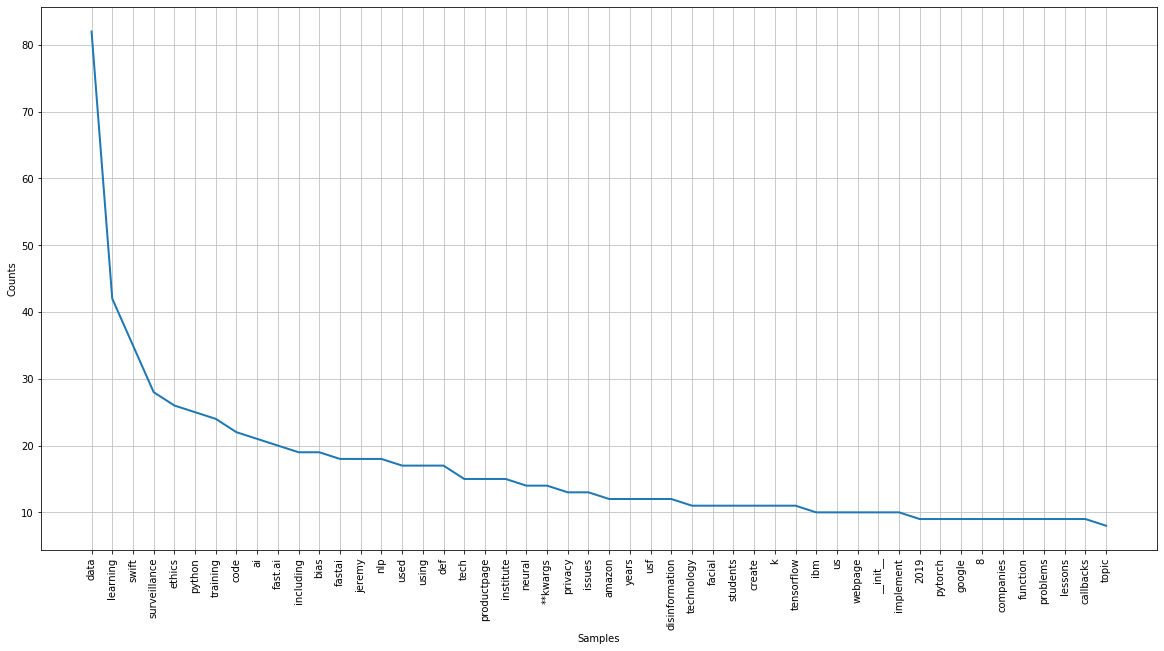

In [110]:
#グラフの表示サイズ調整
rcParams['figure.figsize'] = 20,10
#上位50の出現度をグラフで表示
fdist.plot(50)

In [99]:
#上位500の出現数を表示
fdist.most_common(500)

[('data', 82),
 ('learning', 42),
 ('swift', 35),
 ('surveillance', 28),
 ('ethics', 26),
 ('python', 25),
 ('training', 24),
 ('code', 22),
 ('including', 19),
 ('bias', 19),
 ('fastai', 18),
 ('jeremy', 18),
 ('used', 17),
 ('using', 17),
 ('tech', 15),
 ('productpage', 15),
 ('institute', 15),
 ('neural', 14),
 ('**kwargs', 14),
 ('privacy', 13),
 ('issues', 13),
 ('amazon', 12),
 ('years', 12),
 ('disinformation', 12),
 ('technology', 11),
 ('facial', 11),
 ('students', 11),
 ('create', 11),
 ('tensorflow', 11),
 ('webpage', 10),
 ('__init__', 10),
 ('implement', 10),
 ('pytorch', 9),
 ('google', 9),
 ('companies', 9),
 ('function', 9),
 ('problems', 9),
 ('lessons', 9),
 ('callbacks', 9),
 ('topic', 8),
 ('courses', 8),
 ('coders', 8),
 ('foundations', 8),
 ('risks', 8),
 ('accountability', 8),
 ('attributes', 8),
 ('networks', 8),
 ('details', 8),
 ('parameters', 8),
 ('really', 8),
 ('inheritance', 8),
 ('approach', 8),
 ('functions', 8),
 ('getattr', 8),
 ('techniques', 8),
 ('

In [111]:
#上位500の出現数を表示
fdist.most_common(500)

[('data', 82),
 ('learning', 42),
 ('swift', 35),
 ('surveillance', 28),
 ('ethics', 26),
 ('python', 25),
 ('training', 24),
 ('code', 22),
 ('ai', 21),
 ('fast.ai', 20),
 ('including', 19),
 ('bias', 19),
 ('fastai', 18),
 ('jeremy', 18),
 ('nlp', 18),
 ('used', 17),
 ('using', 17),
 ('def', 17),
 ('tech', 15),
 ('productpage', 15),
 ('institute', 15),
 ('neural', 14),
 ('**kwargs', 14),
 ('privacy', 13),
 ('issues', 13),
 ('amazon', 12),
 ('years', 12),
 ('usf', 12),
 ('disinformation', 12),
 ('technology', 11),
 ('facial', 11),
 ('students', 11),
 ('create', 11),
 ('k', 11),
 ('tensorflow', 11),
 ('ibm', 10),
 ('us', 10),
 ('webpage', 10),
 ('__init__', 10),
 ('implement', 10),
 ('2019', 9),
 ('pytorch', 9),
 ('google', 9),
 ('8', 9),
 ('companies', 9),
 ('function', 9),
 ('problems', 9),
 ('lessons', 9),
 ('callbacks', 9),
 ('topic', 8),
 ('courses', 8),
 ('coders', 8),
 ('foundations', 8),
 ('risks', 8),
 ('accountability', 8),
 ('attributes', 8),
 ('networks', 8),
 ('two', 8),
 

In [61]:
#特定の単語が含まれる行の表示(対象：text)
text.concordance('how', lines=5)

no matches


In [17]:
#fdistは辞書形式
fdist.items()

dict_items([('·', 1), ('making', 4), ('neural', 14), ('nets', 2), ('uncool', 2), ('mooc', 1), ('posts', 4), ('topic', 8), ('©', 1), ('rights', 5), ('reserved', 1), ('online', 4), ('courses', 8), ('learning', 42), ('coders', 8), ('foundations', 8), ('computational', 3), ('linear', 4), ('algebra', 3), ('code-first', 5), ('natural', 4), ('processing', 6), ('software', 6), ('fastai', 18), ('pytorch', 9), ('economist', 2), ('schemes', 2), ('masses', 1), ('tech', 15), ('startup', 2), ('diversifying', 1), ('workforce', 1), ('techies', 1), ('york', 5), ('times', 7), ('finally', 7), ('verge', 1), ('shows', 6), ('giants', 1), ('google', 9), ('intel', 1), ('team', 3), ('beats', 1), ('machine-learning', 1), ('code', 22), ('forbes', 2), ('intelligence', 2), ('transforms', 1), ('developing', 1), ('zdnet', 1), ('radically', 1), ('democratize', 1), ('things', 7), ('surveillance', 28), ('rachel', 5), ('thomas', 4), ('departments', 5), ('partnered', 1), ('amazon', 12), ('access', 4), ('video', 3), ('foo

In [18]:
#pandasのdataframeに変換
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
print(df_fdist)

             Frequency
Term                  
·                    1
making               4
neural              14
nets                 2
uncool               2
...                ...
attached             1
sneak                1
peak                 1
forthcoming          1
older                1

[1486 rows x 1 columns]


In [19]:
#表示が省略されないように設定
pd.set_option('display.max_rows' ,2000)

In [20]:
pd.get_option("display.max_rows")

2000

In [21]:
#pdによる出力
print(df_fdist)

                         Frequency
Term                              
·                                1
making                           4
neural                          14
nets                             2
uncool                           2
mooc                             1
posts                            4
topic                            8
©                                1
rights                           5
reserved                         1
online                           4
courses                          8
learning                        42
coders                           8
foundations                      8
computational                    3
linear                           4
algebra                          3
code-first                       5
natural                          4
processing                       6
software                         6
fastai                          18
pytorch                          9
economist                        2
schemes             

In [22]:
#pdによるFrequencyを対象とった降順の出力
df_s = df_fdist.sort_values('Frequency', ascending=False)
print(df_s)

                         Frequency
Term                              
data                            82
learning                        42
swift                           35
surveillance                    28
ethics                          26
python                          25
training                        24
code                            22
including                       19
bias                            19
fastai                          18
jeremy                          18
using                           17
used                            17
tech                            15
productpage                     15
institute                       15
neural                          14
**kwargs                        14
privacy                         13
issues                          13
years                           12
amazon                          12
disinformation                  12
facial                          11
technology                      11
tensorflow          

In [23]:
print(df_s.index)

Index(['data', 'learning', 'swift', 'surveillance', 'ethics', 'python',
       'training', 'code', 'including', 'bias',
       ...
       'solves', 'shift-', 'instantiating', 'hitting', 'decorate', 'overstate',
       'wanted', 'similar', 'heard', 'older'],
      dtype='object', name='Term', length=1486)


In [24]:
#コピペしやすいようにindexのみ表示
for i in range(len(df_s)):
    print(df_s.index[i])

data
learning
swift
surveillance
ethics
python
training
code
including
bias
fastai
jeremy
using
used
tech
productpage
institute
neural
**kwargs
privacy
issues
years
amazon
disinformation
facial
technology
tensorflow
students
create
__init__
webpage
implement
pytorch
lessons
google
function
problems
callbacks
companies
parameters
risks
details
really
accountability
approach
functions
getattr
papers
inheritance
normalization
foundations
coders
courses
networks
chris
topic
techniques
attributes
community
policy
ulmfit
delegates
background
delegation
howard
kwargs
types
ways
transformer
research
things
errors
teaching
applied
process
times
finally
notebooks
topics
examples
oversight
flexible
author=
initialization
implementing
plot
available
self.page
parameter
working
bayes
information
augmentation
videos
shows
modeling
others
provides
software
processing
embeddings
interested
source
ethical
functionality
taught
naive
francisco
fast.
rights
default
date=none
wrote
downtown
york
code-first

In [50]:
df_fdist.to_csv(...)

ValueError: Invalid file path or buffer object type: <class 'ellipsis'>

In [15]:
len(tokens)

3588